In [ ]:
!pip install -q scikit-learn pycaret xgboost imblearn plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.2 MB/s eta 0:00:00
   ━━━

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as pt
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")

In [2]:
# Read in training data
drive_url = "https://drive.google.com/file/d/1J70Sz3_t7znOFZaDHe3SEtpJ69qCUyZy/view?usp=sharing"

# Convert the Google Drive URL to a direct download URL
file_id = drive_url.split('/d/')[1].split('/')[0]
download_url = f"https://drive.google.com/uc?id={file_id}"

# Read the CSV file into a DataFrame
df = pd.read_csv(download_url)

# Display the first few rows of the DataFrame
print(df.head())


   person_age person_gender person_education  person_income  person_emp_exp  \
0        24.0          male           Master        58914.0               2   
1        23.0        female      High School        45873.0               2   
2        29.0        female           Master       240947.0               7   
3        30.0        female         Bachelor        96316.0              10   
4        29.0          male         Bachelor        73033.0               7   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                   OWN     4400.0     VENTURE           5.99   
1                  RENT    11000.0     VENTURE          11.01   
2              MORTGAGE    10000.0     VENTURE          12.69   
3              MORTGAGE     6000.0     MEDICAL          13.49   
4              MORTGAGE     8000.0    PERSONAL          10.51   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.07                         4.0           656  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      36000 non-null  float64
 1   person_gender                   36000 non-null  object 
 2   person_education                36000 non-null  object 
 3   person_income                   36000 non-null  float64
 4   person_emp_exp                  36000 non-null  int64  
 5   person_home_ownership           36000 non-null  object 
 6   loan_amnt                       36000 non-null  float64
 7   loan_intent                     36000 non-null  object 
 8   loan_int_rate                   36000 non-null  float64
 9   loan_percent_income             36000 non-null  float64
 10  cb_person_cred_hist_length      36000 non-null  float64
 11  credit_score                    36000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [3]:
# Read in test data
drive_url = "https://drive.google.com/file/d/1X7Ezau9dfp1BKYyolYEVZzGQqobtEpGn/view?usp=sharing"
# Convert the Google Drive URL to a direct download URL
file_id = drive_url.split('/d/')[1].split('/')[0]
download_url = f"https://drive.google.com/uc?id={file_id}"

# Read the CSV file into a DataFrame
df_test = pd.read_csv(download_url)

# Display the first few rows of the DataFrame
print(df_test.head())


   person_age person_gender person_education  person_income  person_emp_exp  \
0        25.0        female         Bachelor        84973.0               2   
1        24.0          male         Bachelor        87280.0               2   
2        22.0        female        Associate        70178.0               0   
3        27.0          male         Bachelor       176144.0               1   
4        26.0        female         Bachelor       181548.0               3   

  person_home_ownership  loan_amnt        loan_intent  loan_int_rate  \
0              MORTGAGE    14000.0            VENTURE           5.42   
1                   OWN    16000.0          EDUCATION          12.42   
2                   OWN     6500.0            VENTURE           7.49   
3              MORTGAGE     2500.0            MEDICAL           8.49   
4              MORTGAGE    10000.0  DEBTCONSOLIDATION          15.99   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.16  

In [4]:
numerical_features = [
    "person_age", "person_income", "person_emp_exp",
    "loan_amnt", "loan_int_rate", "loan_percent_income",
    "cb_person_cred_hist_length", "credit_score"
]
categorical_features = [
    "person_gender", "person_education",
    "person_home_ownership", "loan_intent", "previous_loan_defaults_on_file"
]

In [ ]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


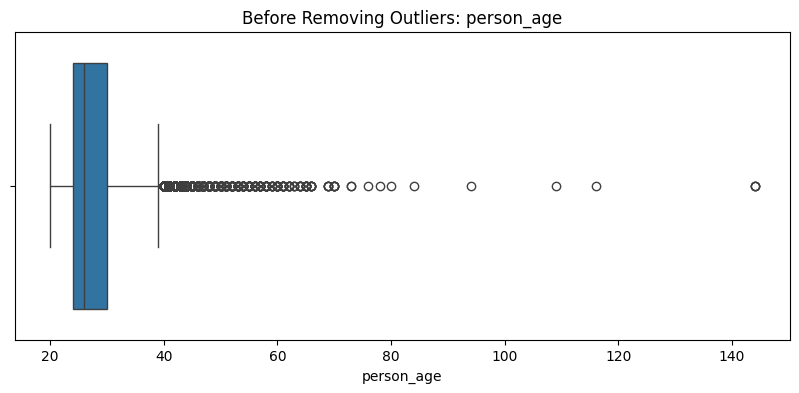

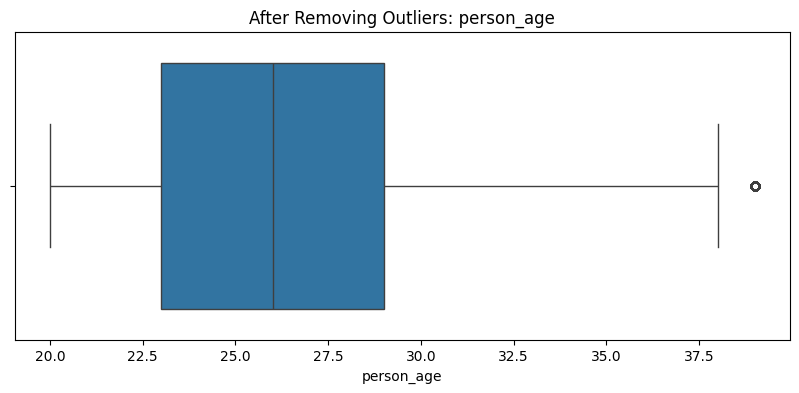

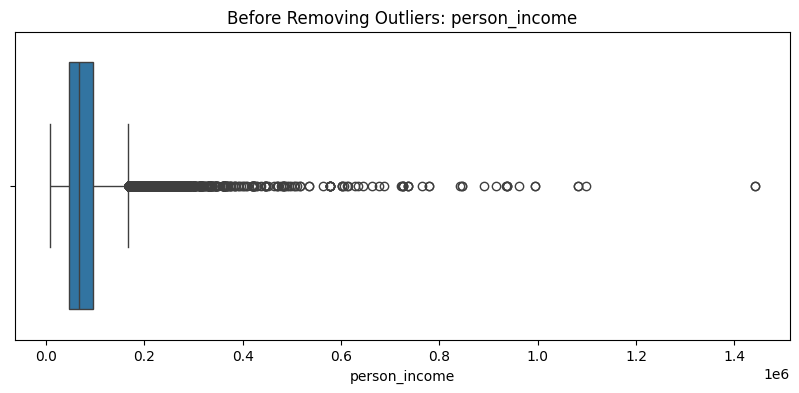

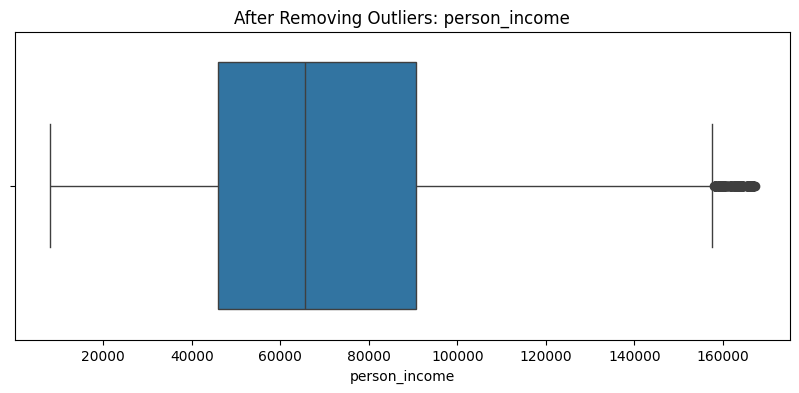

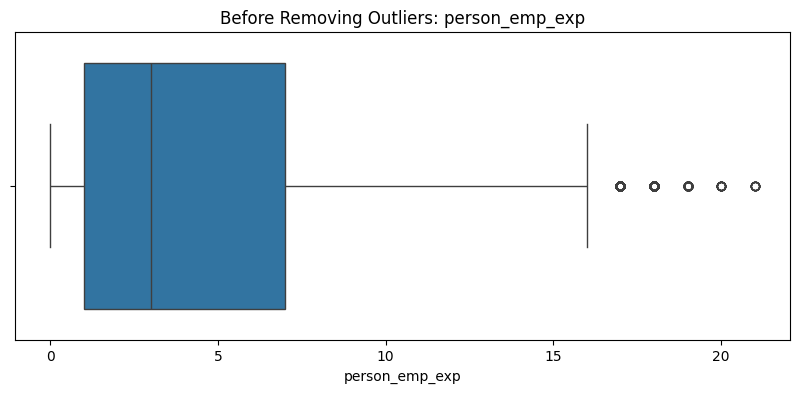

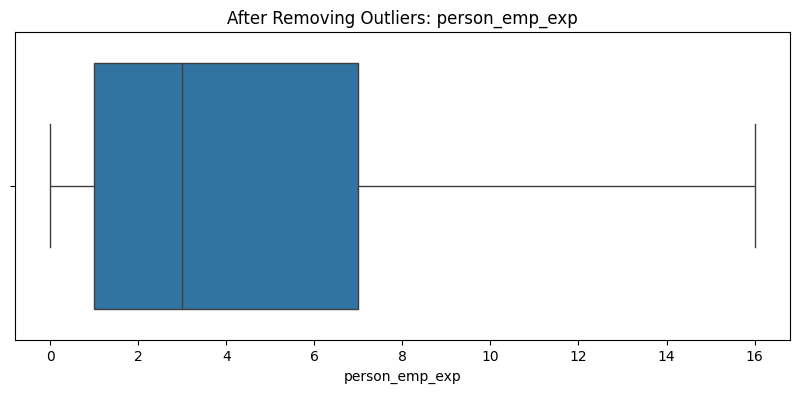

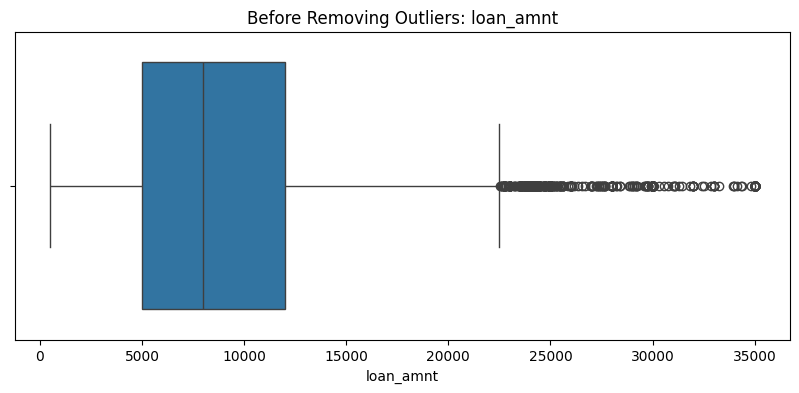

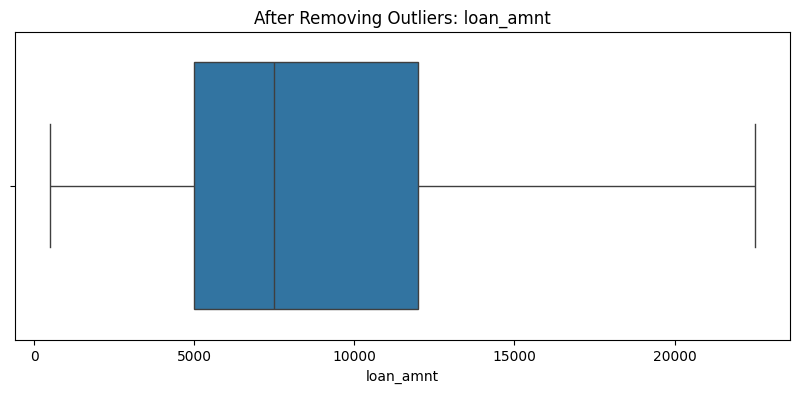

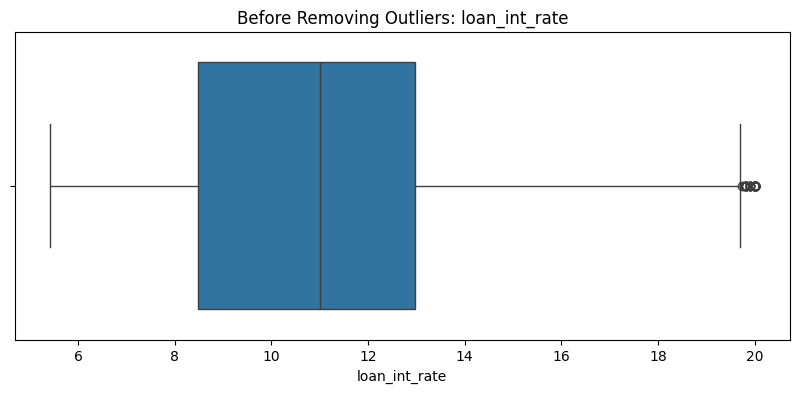

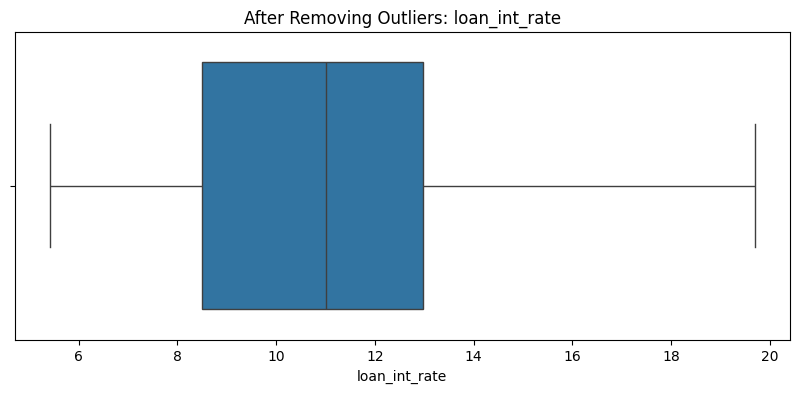

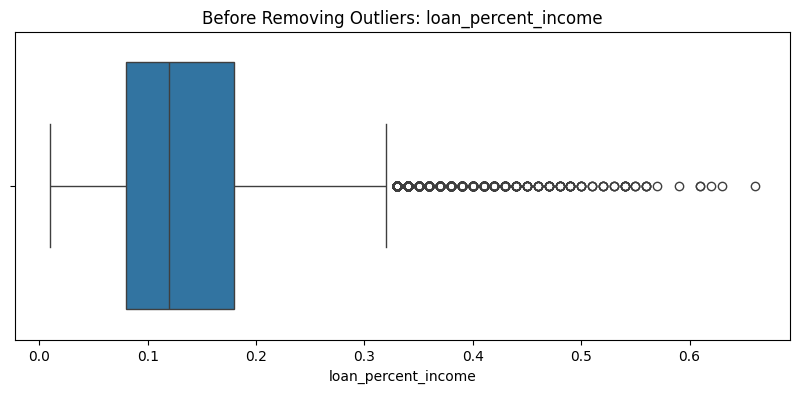

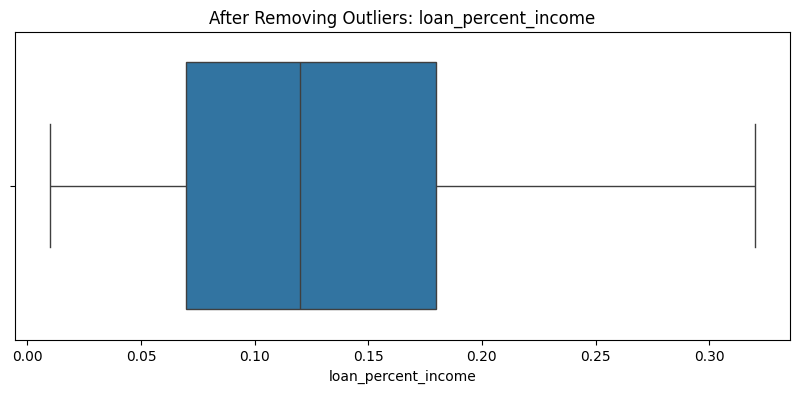

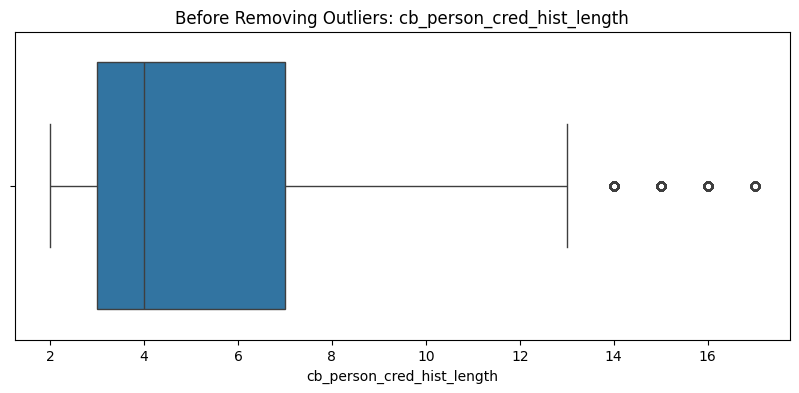

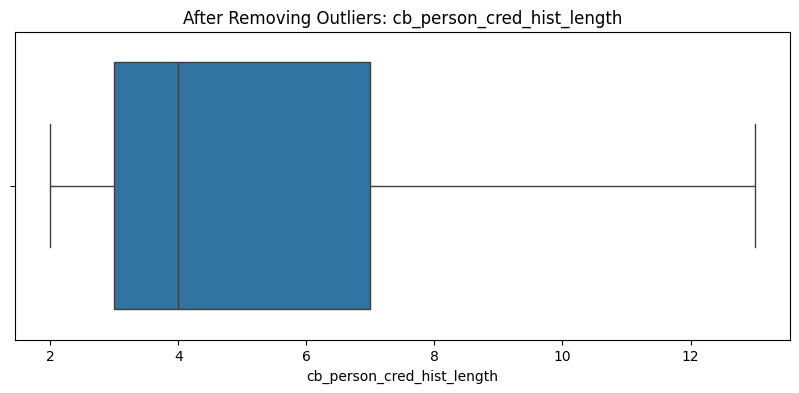

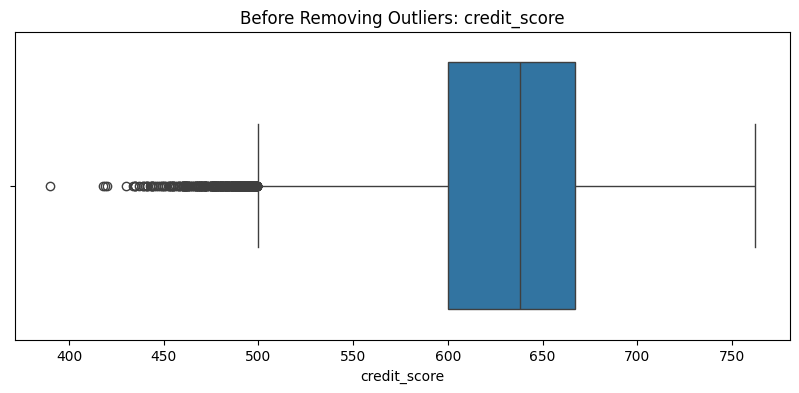

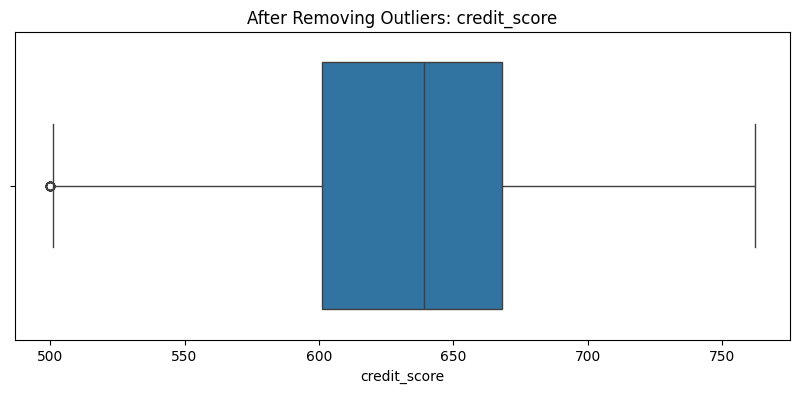

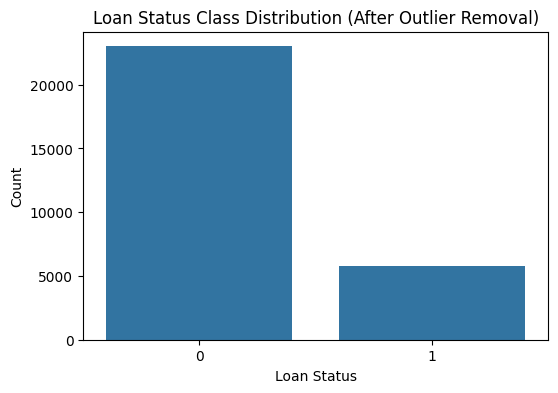

,proportion
loan_status,
0,0.79812
1,0.20188


In [5]:
# Outlier detection
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to detect and remove outliers using the Tukey rule
def remove_outliers_tukey(df, columns):
    cleaned_df = df.copy()
    for col in columns:
        Q1 = cleaned_df[col].quantile(0.25)
        Q3 = cleaned_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Plot before removing outliers
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=cleaned_df[col])
        plt.title(f"Before Removing Outliers: {col}")
        plt.show()

        # Remove outliers
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]

        # Plot after removing outliers
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=cleaned_df[col])
        plt.title(f"After Removing Outliers: {col}")
        plt.show()

    return cleaned_df

# Apply Tukey's rule to remove outliers in numerical columns
df_cleaned = remove_outliers_tukey(df, numerical_features)

# Checking class imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x=df_cleaned["loan_status"])
plt.title("Loan Status Class Distribution (After Outlier Removal)")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

# Display class distribution
df_cleaned["loan_status"].value_counts(normalize=True)


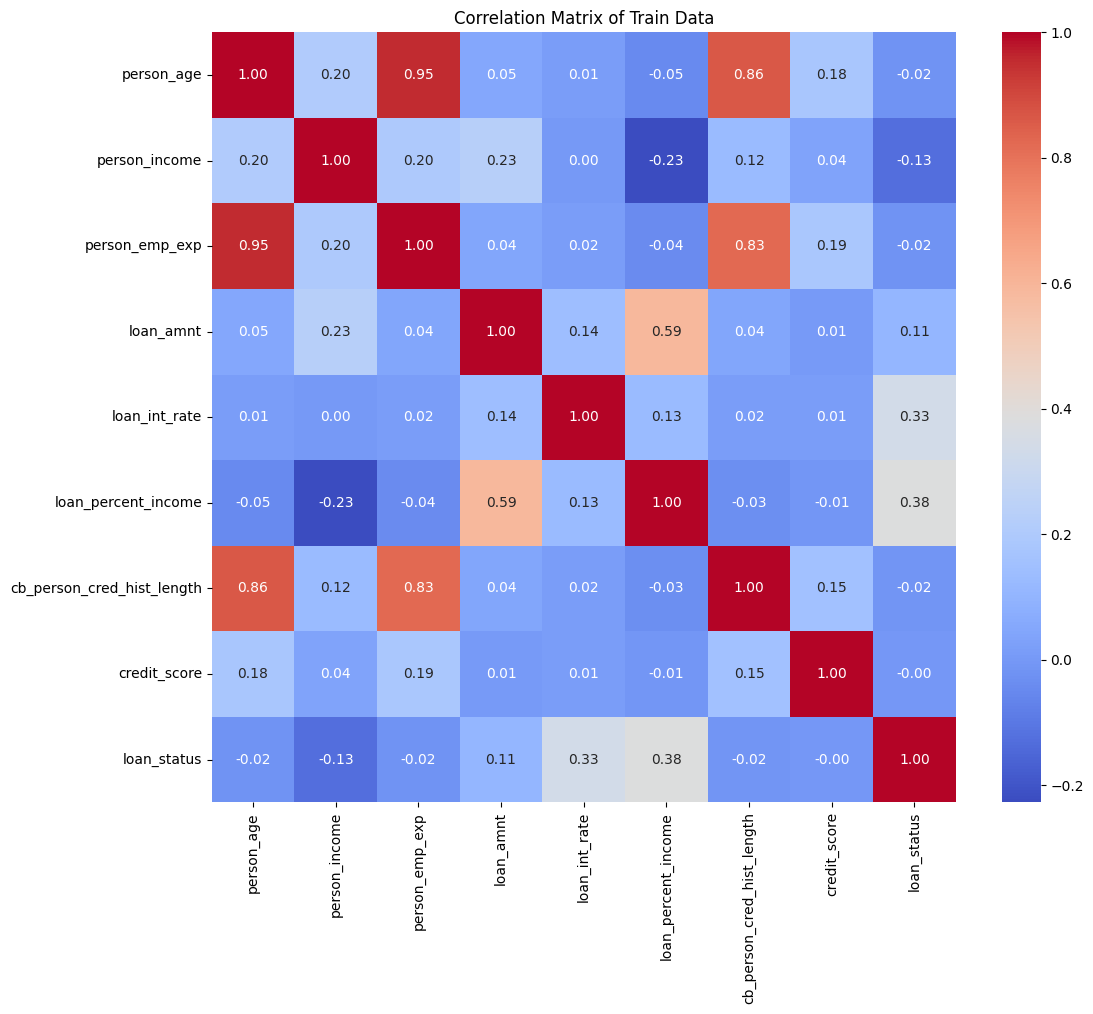

In [ ]:
corr_matrix = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Train Data')
plt.show()

In [ ]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,24.0,male,Master,58914.0,2,OWN,4400.0,VENTURE,5.99,0.07,4.0,656,Yes,0
1,23.0,female,High School,45873.0,2,RENT,11000.0,VENTURE,11.01,0.24,2.0,634,Yes,0
2,29.0,female,Master,240947.0,7,MORTGAGE,10000.0,VENTURE,12.69,0.04,9.0,638,Yes,0
3,30.0,female,Bachelor,96316.0,10,MORTGAGE,6000.0,MEDICAL,13.49,0.06,8.0,682,No,0
4,29.0,male,Bachelor,73033.0,7,MORTGAGE,8000.0,PERSONAL,10.51,0.11,8.0,644,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,23.0,male,Bachelor,89921.0,3,RENT,3500.0,EDUCATION,12.87,0.04,3.0,634,Yes,0
35996,25.0,female,Associate,35911.0,2,RENT,3000.0,EDUCATION,6.62,0.08,4.0,573,No,1
35997,30.0,male,Bachelor,72786.0,9,OWN,20000.0,EDUCATION,6.17,0.27,9.0,477,Yes,0
35998,30.0,male,Associate,39629.0,8,RENT,6000.0,MEDICAL,12.99,0.15,9.0,689,No,0


In [6]:
# Mapping Yes: 1, No: 0
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map({'Yes': 1, 'No': 0})
df_test['previous_loan_defaults_on_file'] = df_test['previous_loan_defaults_on_file'].map({'Yes': 1, 'No': 0})

In [7]:
# Binning ages
# Bins are a bit arbitrary
bins = [18, 25, 35, 50, 100]
labels = ['Young', 'Mid-Age', 'Adult', 'Senior']

df['age_group'] = pd.cut(df['person_age'], bins=bins, labels=labels)
df_test['age_group'] = pd.cut(df_test['person_age'], bins=bins, labels=labels)

# Convert age_group to one-hot encoding
df = pd.get_dummies(df, columns=['age_group'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['age_group'], drop_first=True)

In [8]:
# Feature Engineering: Creating new relevant features

# Debt-to-Income Ratio
df['debt_to_income_ratio'] = df['loan_amnt'] / df['person_income']
df_test['debt_to_income_ratio'] = df_test['loan_amnt'] / df_test['person_income']

# Income per Years of Employment
df['income_per_years_emp'] = df['person_income'] / (df['person_emp_exp'] + 1)
df_test['income_per_years_emp'] = df_test['person_income'] / (df_test['person_emp_exp'] + 1)


# Loan Interest Burden
df['loan_interest_burden'] = df['loan_amnt'] * df['loan_int_rate'] / 100
df_test['loan_interest_burden'] = df_test['loan_amnt'] * df_test['loan_int_rate'] / 100


# We look at some high positive correlates from the confusion matrix and make some new features
## Income-to-Loan Ratio: Measures affordability of the loan.
## Credit History Length-to-Age Ratio: Normalizes credit history by age.
## Employment Experience-to-Age Ratio: Captures how much of their life someone has been employed.


df["income_to_loan_ratio"] = df["person_income"] / df["loan_amnt"]
df_test["income_to_loan_ratio"] = df_test["person_income"] / df_test["loan_amnt"]

df["cred_hist_to_age_ratio"] = df["cb_person_cred_hist_length"] / df["person_age"]
df_test["cred_hist_to_age_ratio"] = df_test["cb_person_cred_hist_length"] / df_test["person_age"]

df["emp_exp_to_age_ratio"] = df["person_emp_exp"] / df["person_age"]
df_test["emp_exp_to_age_ratio"] = df_test["person_emp_exp"] / df_test["person_age"]


df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,...,loan_status,age_group_Mid-Age,age_group_Adult,age_group_Senior,debt_to_income_ratio,income_per_years_emp,loan_interest_burden,income_to_loan_ratio,cred_hist_to_age_ratio,emp_exp_to_age_ratio
0,24.0,male,Master,58914.0,2,OWN,4400.0,VENTURE,5.99,0.07,...,0,False,False,False,0.074685,19638.000,263.56,13.389545,0.166667,0.083333
1,23.0,female,High School,45873.0,2,RENT,11000.0,VENTURE,11.01,0.24,...,0,False,False,False,0.239792,15291.000,1211.10,4.170273,0.086957,0.086957
2,29.0,female,Master,240947.0,7,MORTGAGE,10000.0,VENTURE,12.69,0.04,...,0,True,False,False,0.041503,30118.375,1269.00,24.094700,0.310345,0.241379
3,30.0,female,Bachelor,96316.0,10,MORTGAGE,6000.0,MEDICAL,13.49,0.06,...,0,True,False,False,0.062295,8756.000,809.40,16.052667,0.266667,0.333333
4,29.0,male,Bachelor,73033.0,7,MORTGAGE,8000.0,PERSONAL,10.51,0.11,...,0,True,False,False,0.109540,9129.125,840.80,9.129125,0.275862,0.241379


In [9]:
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)
df_test = pd.get_dummies(df_test, columns=categorical_features, drop_first=True)

In [10]:
scaler = StandardScaler()
numerical_features = ['person_income', 'loan_amnt', 'credit_score', 'loan_int_rate',
                      'loan_percent_income', 'debt_to_income_ratio', 'income_per_years_emp', 'loan_interest_burden',
                      "income_to_loan_ratio", "cred_hist_to_age_ratio", "emp_exp_to_age_ratio"]

# Fit scaler only on training data
scaler.fit(df[numerical_features]) # change from df.head()

# Apply transformation
df[numerical_features] = scaler.transform(df[numerical_features]) # change from df.head()
df_test[numerical_features] = scaler.transform(df_test[numerical_features])

In [ ]:
df.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,age_group_Mid-Age,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_1
0,24.0,58914.0,2,4400.0,5.99,0.07,4.0,656,0,False,...,True,False,True,False,False,False,False,False,True,True
1,23.0,45873.0,2,11000.0,11.01,0.24,2.0,634,0,False,...,False,False,False,True,False,False,False,False,True,True
2,29.0,240947.0,7,10000.0,12.69,0.04,9.0,638,0,True,...,True,False,False,False,False,False,False,False,True,True
3,30.0,96316.0,10,6000.0,13.49,0.06,8.0,682,0,True,...,False,False,False,False,False,False,True,False,False,False
4,29.0,73033.0,7,8000.0,10.51,0.11,8.0,644,0,True,...,False,False,False,False,False,False,False,True,False,True


In [ ]:
df['loan_status'].value_counts(normalize=True)

,proportion
loan_status,
0,0.777778
1,0.222222


Class distribution after SMOTE:


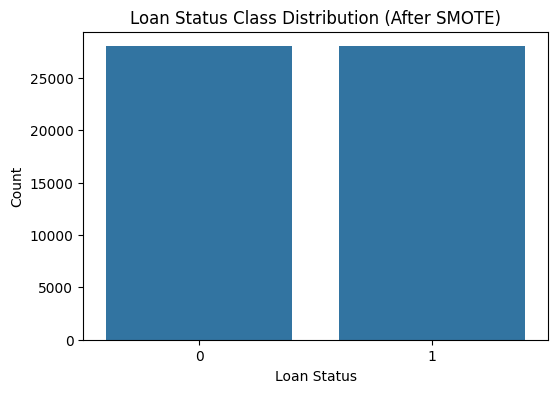

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,age_group_Mid-Age,age_group_Adult,...,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_1,loan_status
0,24.0,-0.256600,2,-0.823150,-1.687749,-0.800883,4.0,0.464300,False,False,...,False,True,False,False,False,False,False,True,True,0
1,23.0,-0.411269,2,0.224243,-0.001061,1.154322,2.0,0.026852,False,False,...,False,False,True,False,False,False,False,True,True,0
2,29.0,1.902342,7,0.065547,0.563408,-1.145920,9.0,0.106388,True,False,...,False,False,False,False,False,False,False,True,True,0
3,30.0,0.186994,10,-0.569236,0.832203,-0.915896,8.0,0.981285,True,False,...,False,False,False,False,False,True,False,False,False,0
4,29.0,-0.089147,7,-0.251845,-0.169058,-0.340835,8.0,0.225692,True,False,...,False,False,False,False,False,False,True,False,True,0


In [11]:
from imblearn.over_sampling import SMOTE

X = df.drop(columns=['loan_status']).copy()
y = df['loan_status'].copy()

# Check for any missing values before SMOTE
assert X.isnull().sum().sum() == 0, "Warning: Missing values detected in X before SMOTE."

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Checking the new class distribution
print("Class distribution after SMOTE:")
# Checking class imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled)
plt.title("Loan Status Class Distribution (After SMOTE)")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

# Convert back to DataFrame
df_train_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['loan_status'])], axis=1)

# Display first few rows of the resampled training set
df_train_resampled.head()

In [ ]:
print(df_train_resampled.duplicated().sum())

0


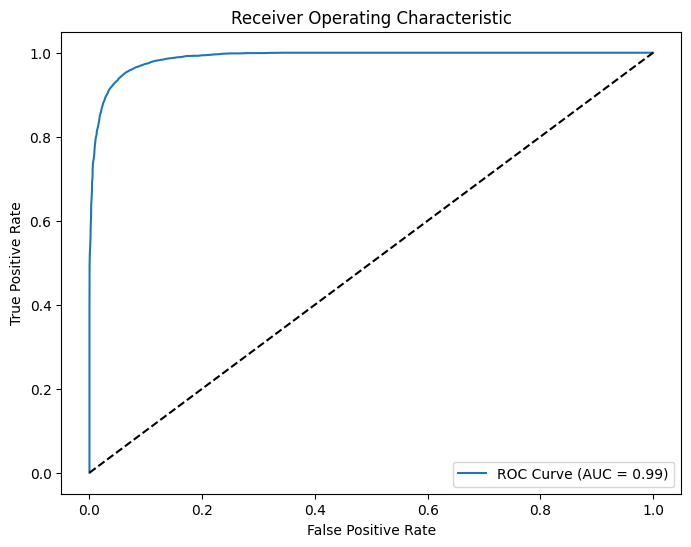

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 分离特征和目标变量
X = df_train_resampled.drop(columns=['loan_status']).copy()
y = df_train_resampled['loan_status'].copy()

# 按 8:2 的比例分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=222)

# 初始化并训练随机森林分类器
model = RandomForestClassifier(random_state=222)
model.fit(X_train, y_train)

# 对测试集进行预测（获取正类别的预测概率）
y_proba = model.predict_proba(X_test)[:, 1]

# 计算 ROC 曲线数据及 AUC 值
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# 绘制 ROC 曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # 对角线参考
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [23]:
# 在测试集上进行预测
y_pred = model.predict(X_test)

# 计算 F1 分数
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.9446294024881724



Feature Importance:


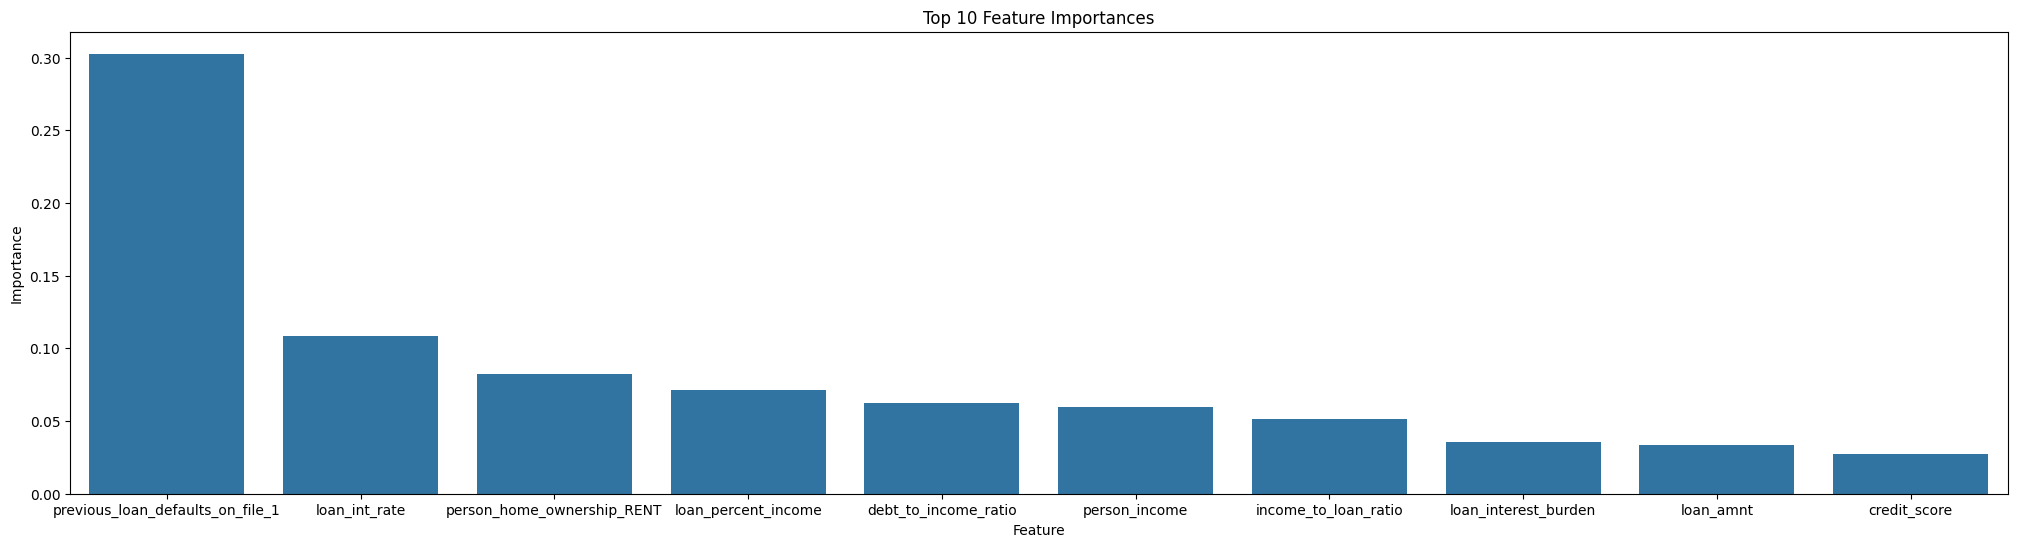

In [19]:
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train_resampled.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")

plt.figure(figsize=(25, 6))
sns.barplot(x=feature_importance_df['Feature'][:10], y=feature_importance_df['Importance'][:10])
plt.title("Top 10 Feature Importances")
plt.show()

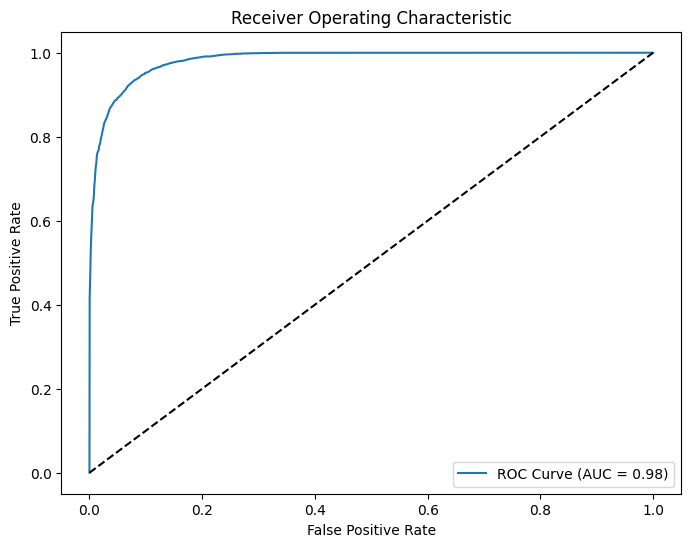

In [30]:
top7_features = feature_importance_df['Feature'].head(7).tolist()

# 使用 top7_features 筛选新的训练集特征
X_train_top7= X_train[top7_features]
X_test_top7 = X_test[top7_features]

# 重新初始化并训练随机森林模型
model_top7 = RandomForestClassifier(random_state=222)
model_top7.fit(X_train_top7, y_train)

# 对测试集进行预测（获取正类别的预测概率）
y_proba = model_top7.predict_proba(X_test_top7)[:, 1]

# 计算 ROC 曲线数据及 AUC 值
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# 绘制 ROC 曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # 对角线参考
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [31]:
# 在测试集上进行预测
y_pred_top7 = model_top7.predict(X_test_top7)

# 计算 F1 分数
f1 = f1_score(y_test, y_pred_top7)
print("F1 Score:", f1)

F1 Score: 0.928319209039548


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV


# 从整个数据集中抽取10%作为网格搜索的训练和验证数据
X_subset, _, y_subset, _ = train_test_split(X, y, test_size=0.9, random_state=222)

# 定义随机森林模型的参数搜索范围
param_grid = {
    'n_estimators': [150, 200, 250],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# 初始化随机森林模型
rf = RandomForestClassifier(random_state=222)

# 使用 F1 分数作为评价指标，设置 5 折交叉验证进行网格搜索
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_subset, y_subset)

# 输出网格搜索的最佳参数和对应的最佳 F1 分数
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 Score: 0.9102110738580522


Notice that our new generated features, debt_to_income ratio and income_to_loan_ratio are #5, #6 in feature importance. Can you come up with better correlates that are feature important?

## Suggestion: Run CV, plot ROC Curves, Perform more feature engineering if the performance is low, compare with PyCaret

In [35]:
# Create submit.csv on local drive for submission to Kaggle competition

import pandas as pd

# Assuming final_model is your trained model and X_test is your test dataset
# Generate predictions
predictions = model.predict(df_test)

# Create a DataFrame with ID and TARGET columns
submission_df = pd.DataFrame({
    'ID': range(1, len(df_test) + 1),
    'TARGET': predictions
})

# Save to submit.csv
submission_df.to_csv('submit.csv', index=False)

print("submit.csv file created successfully!")

# # Download the CSV file to local machine
# files.download('submit.csv')



submit.csv file created successfully!
